In [63]:
import astropy.units as u
from astropy.units import Quantity
import numpy as np
import sys
sys.path.append('/Users/clairewilliams/opt/anaconda3/lib/python3.9/site-packages')
import pandas
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support

sys.path.append('/Users/clairewilliams/Research/Calculations/model-timescales/src')

# from timescales.data import build_bulk_energy_grid
from timescales import TimescaleEnsemble
from timescales.profiles.power_law import PowerLawProfile

from timescales.physics.collisions import collision_timescale
from timescales.physics.relaxation import relaxation_timescale

from timescales.analysis.tables import structural_table, timescale_table
from timescales.analysis.recipes import generate_timescale_comparison,collision_vs_main_sequence, destructive_colllision_criterion


In [86]:
#define parameters
cluster_mass= 1e6 *u.Msun
alpha= 1.25
r0 = 0.25 *u.pc
rho0 = 1.35*1e6 *u.Msun /(u.pc**3)
ecc = 0.
Mstar = 1*u.Msun
grid = {'M':np.array([cluster_mass.value])*cluster_mass.unit,'R':np.array([r0.value])*r0.unit}

In [87]:
tmodel = TimescaleEnsemble(grid, 
                        densityModel='powerLaw',
                        alpha = alpha,
                        Nsampling =100,
                        Mstar = Mstar,
                        e = ecc,
                        profile_kwargs={'rho0':rho0},
                        velocity_function= PowerLawProfile.velocity_dispersion_BH
                        )

In [88]:
t_coll = collision_timescale(tmodel.n[0],
                        tmodel.sigma[0],
                        tmodel.Mstar,
                        e = tmodel.e,
                        alpha = tmodel.alpha).to('yr')

t_rel = relaxation_timescale(
                        tmodel.sigma[0],
                        tmodel.rho[0],
                        tmodel.Mstar,
                        coulomb = 10).to('yr')


In [89]:
table5 = generate_timescale_comparison(tmodel, as_ = 'pandas')


Using ensemble value of Mstar: 1.0 solMass


In [90]:
table5

,system_id,r,t_coll,t_relax,sigma/vesc,massloss,t_relax/t_coll,t_ms/t_relax,t_ms/t_coll,shortest,t_ms
0,0,0.001 pc,68772136.65669389 yr,3539259400.7342005 yr,2.238357608042332,1.0,51.46356610093354,2.825449866128929,145.40772595039996,t_coll,10000000000.0 yr
1,0,0.0010573569305266988 pc,75106139.7077473 yr,3490253652.2476087 yr,2.1768006780785454,1.0,46.47094985614851,2.8651212766614624,133.144907179519,t_coll,10000000000.0 yr
2,0,0.0011180036785328434 pc,81986806.36311595 yr,3441926453.455404 yr,2.1169366213236454,1.0,41.98146758164068,2.905349703204972,121.9708443784289,t_coll,10000000000.0 yr
3,0,0.0011821289378510453 pc,89456314.96685478 yr,3394268408.93559 yr,2.0587188821793787,1.0,37.94330685534307,2.9461429666771415,111.78640662434155,t_coll,10000000000.0 yr
4,0,0.001249932225212968 pc,97559457.84487045 yr,3347270253.3582435 yr,2.002102185370025,1.0,34.310053861520494,2.9875089978071587,102.50159462654074,t_coll,10000000000.0 yr
...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.20001084455391493 pc,21446174839.2756 yr,941128680.0659434 yr,0.15827149343552924,0.0,0.0438832886106291,10.625539537589393,0.46628361817168584,t_relax,10000000000.0 yr
96,0,0.2114828526695802 pc,22391962250.058838 yr,928097503.1538297 yr,0.15391887917868768,0.0,0.04144779688307089,10.77472998905647,0.44658882005634515,t_relax,10000000000.0 yr
97,0,0.2236128599577374 pc,23377815003.083385 yr,915246760.1986358 yr,0.14968596588920058,0.0,0.039150226831631635,10.926015185052064,0.42775597286064004,t_relax,10000000000.0 yr
98,0,0.23643860723121 pc,24405444358.229855 yr,902573952.8525124 yr,0.14556946167839122,0.0,0.03698248389188422,11.079424537342126,0.409744639483602,t_relax,10000000000.0 yr


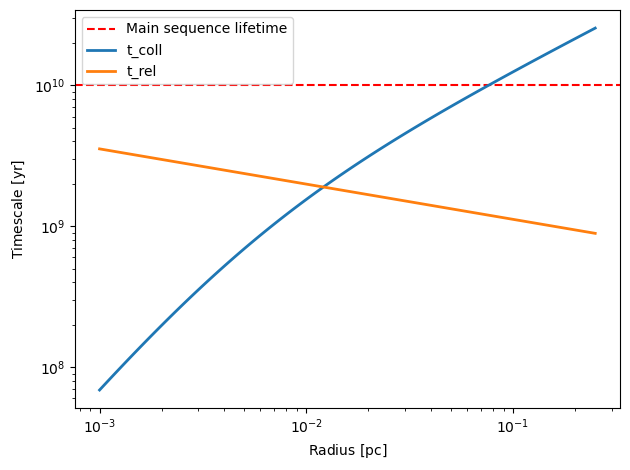

In [91]:
# fig, ax = plt.subplots(figsize=(6, 4))

r = u.Quantity(table5['r']).to(u.pc)            # pick your unit
t_coll = u.Quantity(table5['t_coll']).to(u.yr)
t_rel = u.Quantity(table5['t_relax']).to(u.yr)

fig, ax = plt.subplots()
plt.axhline(y=1e10, color='r', linestyle='--', label='Main sequence lifetime')

with quantity_support():                        # lets mpl handle Quantity directly
    ax.plot(r, t_coll, lw=2, label="t_coll")
    ax.plot(r, t_rel, lw=2, label="t_rel")
    ax.set_xlabel(f"r [{r.unit}]")
    ax.set_ylabel(f"$t_{{\mathrm{{coll}}}}$ [{t.unit}]")

# Axes labels with units
ax.set_xlabel(f"Radius [{r.unit.to_string('latex_inline')}]")
ax.set_ylabel(f"Timescale [{t_coll.unit.to_string('latex_inline')}]")

# Log scale for both axes (optional)
ax.set_xscale('log')
ax.set_yscale('log')

# Optional grid
# ax.grid(True, which='both', ls='--', alpha=0.5)

# Title
# ax.set_title("Astrophysical Timescale vs. Radius")
plt.legend()

plt.tight_layout()
plt.show()
